In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import chi2, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix

# Reading csv file


In [2]:
df=pd.read_csv(r"/Users/macbook/Desktop/task_ds/sample_dataset.csv")
df.head()

,CustomerID,Age,Gender,MaritalStatus,NumOfChildren,AccountBalance,CreditScore,NumOfProducts,IsActiveMember,NumOfTransactions,TotalTransactionAmount,LastTransactionDate,FirstLoginDate,LastLoginDate,NumOfLogins,NumOfMobileOperations,LastOperationDate,ChurnCategory
0,1,28,Female,Single,0,4785,775,2,0,166,19624,2023-04-17,2023-09-05,2023-01-21,305,96,2023-09-06,Low Churn
1,2,57,Male,Married,0,4373,656,3,0,398,16162,2023-10-11,2023-06-24,2023-03-18,90,72,2023-03-16,Low Churn
2,3,27,Female,Single,1,2214,560,4,0,310,30085,2023-02-19,2023-08-28,2023-08-16,189,17,2023-01-31,Medium Churn
3,4,33,Female,Married,0,8857,502,4,1,207,35082,2023-05-18,2023-08-08,2024-01-01,171,11,2023-03-09,Low Churn
4,5,65,Male,Married,0,9035,760,4,1,59,9451,2023-02-10,2023-01-12,2023-01-02,170,32,2023-12-09,Medium Churn


In [3]:
print("Number of rows: " ,df.shape[0])
print("Number of columns: ", df.shape[1])


Number of rows:  200000
Number of columns:  18


In [4]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'NumOfChildren',
       'AccountBalance', 'CreditScore', 'NumOfProducts', 'IsActiveMember',
       'NumOfTransactions', 'TotalTransactionAmount', 'LastTransactionDate',
       'FirstLoginDate', 'LastLoginDate', 'NumOfLogins',
       'NumOfMobileOperations', 'LastOperationDate', 'ChurnCategory'],
      dtype='object')

In [5]:
df.sample(10)

,CustomerID,Age,Gender,MaritalStatus,NumOfChildren,AccountBalance,CreditScore,NumOfProducts,IsActiveMember,NumOfTransactions,TotalTransactionAmount,LastTransactionDate,FirstLoginDate,LastLoginDate,NumOfLogins,NumOfMobileOperations,LastOperationDate,ChurnCategory
158746,158747,27,Male,Single,0,5709,741,4,0,204,5422,2023-12-30,2023-03-31,2023-04-10,340,4,2023-06-09,Low Churn
173455,173456,32,Male,Divorced,1,1493,638,2,1,52,116,2023-09-24,2023-12-17,2023-06-25,147,83,2023-01-06,Low Churn
116688,116689,38,Male,Married,2,6756,537,3,1,86,37310,2023-04-09,2023-11-18,2023-11-02,181,60,2023-12-19,Low Churn
17616,17617,19,Male,Single,3,6253,503,2,0,52,35671,2023-07-29,2023-02-10,2023-06-07,33,26,2023-10-11,Low Churn
1249,1250,51,Female,Single,1,3872,764,3,1,438,24131,2023-04-15,2023-12-30,2023-08-17,316,95,2023-08-06,Medium Churn
4906,4907,58,Male,Divorced,1,6190,640,3,0,245,26378,2023-04-05,2023-10-23,2023-09-21,340,54,2023-10-20,Medium Churn
22447,22448,48,Female,Single,1,2279,573,1,0,417,8754,2023-04-08,2023-05-26,2023-01-26,163,53,2023-10-11,Low Churn
169658,169659,21,Male,Married,3,2559,776,4,1,7,28490,2023-05-12,2023-09-15,2023-12-18,302,13,2023-07-22,Low Churn
24449,24450,24,Male,Single,3,8056,742,4,1,313,34319,2023-07-06,2023-03-06,2023-01-15,135,90,2023-10-14,Medium Churn
42013,42014,43,Male,Divorced,0,1716,750,3,0,270,263,2023-07-31,2023-10-24,2023-06-21,274,58,2023-09-24,Low Churn


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CustomerID              200000 non-null  int64 
 1   Age                     200000 non-null  int64 
 2   Gender                  200000 non-null  object
 3   MaritalStatus           200000 non-null  object
 4   NumOfChildren           200000 non-null  int64 
 5   AccountBalance          200000 non-null  int64 
 6   CreditScore             200000 non-null  int64 
 7   NumOfProducts           200000 non-null  int64 
 8   IsActiveMember          200000 non-null  int64 
 9   NumOfTransactions       200000 non-null  int64 
 10  TotalTransactionAmount  200000 non-null  int64 
 11  LastTransactionDate     200000 non-null  object
 12  FirstLoginDate          200000 non-null  object
 13  LastLoginDate           200000 non-null  object
 14  NumOfLogins             200000 non-n

# Checking null and duplicated values

In [7]:
df.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
MaritalStatus             0
NumOfChildren             0
AccountBalance            0
CreditScore               0
NumOfProducts             0
IsActiveMember            0
NumOfTransactions         0
TotalTransactionAmount    0
LastTransactionDate       0
FirstLoginDate            0
LastLoginDate             0
NumOfLogins               0
NumOfMobileOperations     0
LastOperationDate         0
ChurnCategory             0
dtype: int64

In [8]:
df[df.duplicated()]

,CustomerID,Age,Gender,MaritalStatus,NumOfChildren,AccountBalance,CreditScore,NumOfProducts,IsActiveMember,NumOfTransactions,TotalTransactionAmount,LastTransactionDate,FirstLoginDate,LastLoginDate,NumOfLogins,NumOfMobileOperations,LastOperationDate,ChurnCategory


In [9]:
 df['ChurnCategory'].value_counts()

ChurnCategory
Low Churn       120000
Medium Churn     60000
High Churn       20000
Name: count, dtype: int64

# Resampling dataset using random oversampling method

In [10]:
X = df.drop(columns=['ChurnCategory'])
y = df['ChurnCategory']

# Random Oversampling code
ros = RandomOverSampler(sampling_strategy='auto', 
                        random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Creating a new DataFrame with the resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['ChurnCategory'] = y_resampled

In [11]:
#Proving that it worked
counts = resampled_df['ChurnCategory'].value_counts()
counts

ChurnCategory
Low Churn       120000
Medium Churn    120000
High Churn      120000
Name: count, dtype: int64

In [12]:
#Updating original dataframe with new values
df=resampled_df

# Hypothesis testing

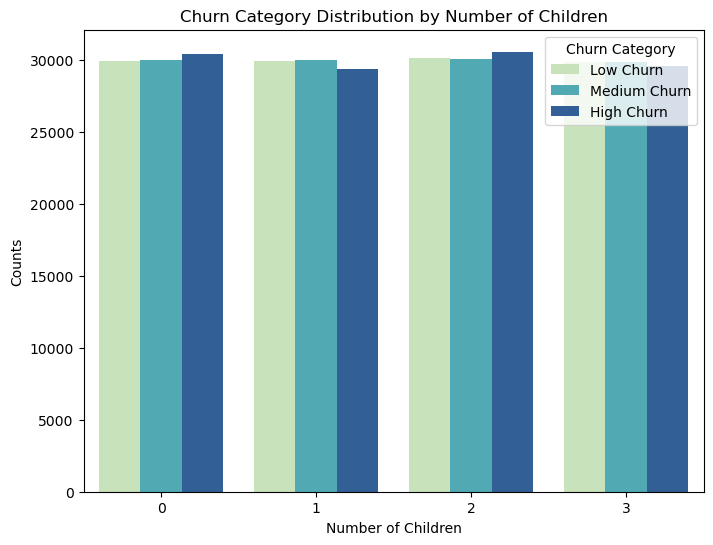

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NumOfChildren', hue='ChurnCategory', palette='YlGnBu')


plt.xlabel('Number of Children')
plt.ylabel('Counts')
plt.title('Churn Category Distribution by Number of Children')

plt.legend(title='Churn Category')
plt.show()


In [14]:

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['NumOfChildren'], df['ChurnCategory'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

print(expected)

# Determine the significance of the result
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p < alpha:
    print("There is a statistically significant association between NumOfChildren and ChurnCategory.")
else:
    print("There is no statistically significant association between  NumOfChildren and ChurnCategory.")

Chi-squared statistic: 18.7038894109109
P-value: 0.004694072371343778
[[30139.33333333 30139.33333333 30139.33333333]
 [29799.66666667 29799.66666667 29799.66666667]
 [30269.66666667 30269.66666667 30269.66666667]
 [29791.33333333 29791.33333333 29791.33333333]]
There is a statistically significant association between NumOfChildren and ChurnCategory.


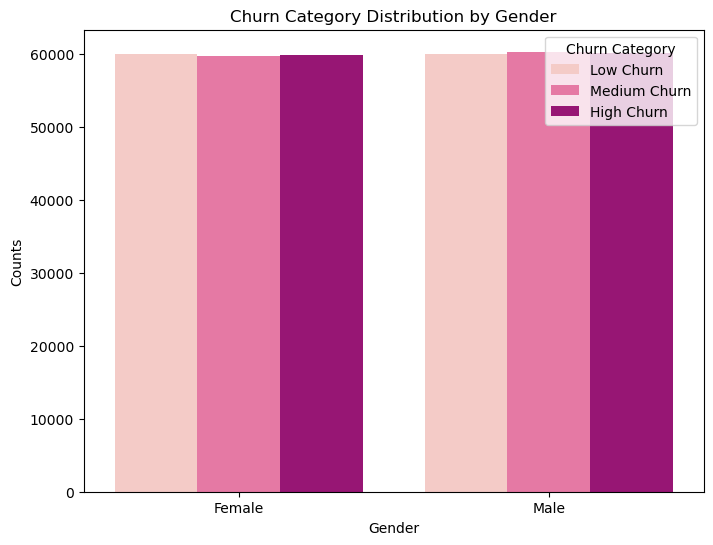

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='ChurnCategory', palette='RdPu')


plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Churn Category Distribution by Gender')

plt.legend(title='Churn Category')
plt.show()

In [16]:

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['ChurnCategory'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

print(expected)

# Determine the significance of the result
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p < alpha:
    print("There is a statistically significant association between Gender and ChurnCategory.")
else:
    print("There is no statistically significant association between Gender and ChurnCategory.")

Chi-squared statistic: 1.391299753437016
P-value: 0.4987502164872506
[[59832.33333333 59832.33333333 59832.33333333]
 [60167.66666667 60167.66666667 60167.66666667]]
There is no statistically significant association between Gender and ChurnCategory.


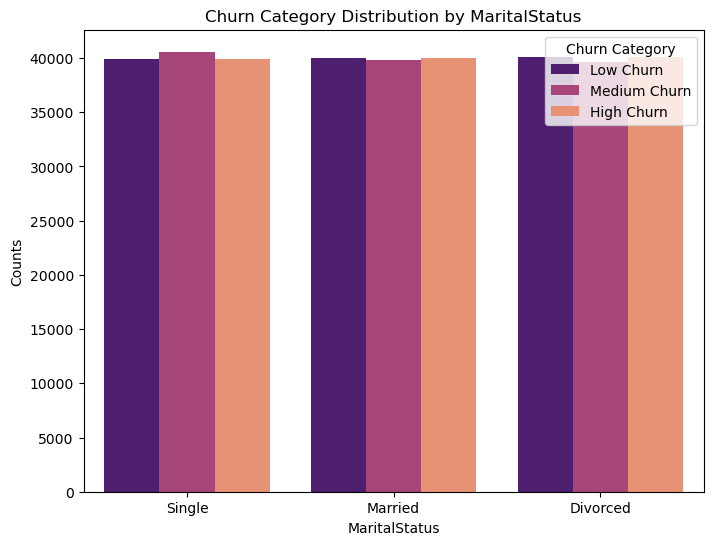

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MaritalStatus', hue='ChurnCategory', palette='magma')


plt.xlabel('MaritalStatus')
plt.ylabel('Counts')
plt.title('Churn Category Distribution by MaritalStatus')

plt.legend(title='Churn Category')
plt.show()

In [18]:

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['MaritalStatus'], df['ChurnCategory'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

print(expected)

# Determine the significance of the result
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p < alpha:
    print("There is a statistically significant association between MaritalStatus and ChurnCategory.")
else:
    print("There is no statistically significant association between MaritalStatus and ChurnCategory.")

Chi-squared statistic: 10.756466405343705
P-value: 0.02944173447848397
[[39929.66666667 39929.66666667 39929.66666667]
 [39923.33333333 39923.33333333 39923.33333333]
 [40147.         40147.         40147.        ]]
There is a statistically significant association between MaritalStatus and ChurnCategory.


# Feature Engineering

In [20]:
df.dtypes

CustomerID                 int64
Age                        int64
Gender                    object
MaritalStatus             object
NumOfChildren              int64
AccountBalance             int64
CreditScore                int64
NumOfProducts              int64
IsActiveMember             int64
NumOfTransactions          int64
TotalTransactionAmount     int64
LastTransactionDate       object
FirstLoginDate            object
LastLoginDate             object
NumOfLogins                int64
NumOfMobileOperations      int64
LastOperationDate         object
ChurnCategory             object
dtype: object

In [21]:
# Ensuring the date columns are in datetime64 format.
df['FirstLoginDate'] = pd.to_datetime(df['FirstLoginDate'])
df['LastLoginDate'] = pd.to_datetime(df['LastLoginDate'])
df['LastOperationDate'] = pd.to_datetime(df['LastOperationDate'])
df['LastTransactionDate'] = pd.to_datetime(df['LastTransactionDate'])


In [22]:
#There are some inconviniences about dates, probably because data is not real life data.
#In order to fix that I will make some changes.

# Identifing the rows where FirstLoginDate is greater than LastLoginDate
mask = df['FirstLoginDate'] > df['LastLoginDate']

# Updating the year for FirstLoginDate in those rows to 2022
df.loc[mask, 'FirstLoginDate'] = df.loc[mask, 'FirstLoginDate'].apply(lambda x: x.replace(year=2022))

df.shape


(360000, 18)

In [24]:
#Working with date type data may cause some problems in the process of encoding.
#Making new and effective features based on those columns and deleting originals 
#from dataframe can solve the problem.

#NoOperation - The customer have not done any operation on their account for X days. 
#NoTransaction - The customer have not done any transactions on their account for X days. 


df['MaxDate'] = pd.to_datetime('2023-12-31')  
df['NoOperation'] = (df['MaxDate'] - df['LastOperationDate']).dt.days
df['NoTransaction'] = (df['MaxDate'] - df['LastTransactionDate']).dt.days
df['NoLogin'] = (df['MaxDate'] - df['LastLoginDate']).dt.days
# Calculating tenure 
df['Tenure'] = (df['LastLoginDate'] - df['FirstLoginDate']).dt.days




In [25]:
datetime_columns = df.select_dtypes(include=['datetime64'])

# Drop the datetime columns
df = df.drop(columns=datetime_columns.columns)
df

,CustomerID,Age,Gender,MaritalStatus,NumOfChildren,AccountBalance,CreditScore,NumOfProducts,IsActiveMember,NumOfTransactions,TotalTransactionAmount,NumOfLogins,NumOfMobileOperations,ChurnCategory,NoOperation,NoTransaction,NoLogin,Tenure
0,1,28,Female,Single,0,4785,775,2,0,166,19624,305,96,Low Churn,116,258,344,138
1,2,57,Male,Married,0,4373,656,3,0,398,16162,90,72,Low Churn,290,81,288,267
2,3,27,Female,Single,1,2214,560,4,0,310,30085,189,17,Medium Churn,334,315,137,353
3,4,33,Female,Married,0,8857,502,4,1,207,35082,171,11,Low Churn,297,227,-1,146
4,5,65,Male,Married,0,9035,760,4,1,59,9451,170,32,Medium Churn,22,324,363,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,9293,58,Female,Single,3,2180,580,4,0,229,21509,11,33,Medium Churn,159,89,88,286
359996,105064,46,Male,Married,3,7680,583,2,0,443,39312,341,14,Medium Churn,240,152,350,269
359997,199828,63,Female,Divorced,0,5463,845,2,1,82,12200,191,51,Medium Churn,237,133,101,41
359998,178634,54,Female,Divorced,3,9809,715,3,1,473,15548,264,44,Medium Churn,74,340,291,306


# Encoding

In [26]:
#Encoding target column with the help of labelencoder()
X = df.drop(columns=['ChurnCategory'])
y = df['ChurnCategory']

label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

In [27]:
#Encoding remaining columns with one-hot encoding 
one_hot_encoded = pd.get_dummies(X)
X=one_hot_encoded

In [28]:
#Replacing True and False with 1 and 0s
X = X.replace({True: 1, False: 0})

In [29]:
X

,CustomerID,Age,NumOfChildren,AccountBalance,CreditScore,NumOfProducts,IsActiveMember,NumOfTransactions,TotalTransactionAmount,NumOfLogins,NumOfMobileOperations,NoOperation,NoTransaction,NoLogin,Tenure,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,28,0,4785,775,2,0,166,19624,305,96,116,258,344,138,1,0,0,0,1
1,2,57,0,4373,656,3,0,398,16162,90,72,290,81,288,267,0,1,0,1,0
2,3,27,1,2214,560,4,0,310,30085,189,17,334,315,137,353,1,0,0,0,1
3,4,33,0,8857,502,4,1,207,35082,171,11,297,227,-1,146,1,0,0,1,0
4,5,65,0,9035,760,4,1,59,9451,170,32,22,324,363,355,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,9293,58,3,2180,580,4,0,229,21509,11,33,159,89,88,286,1,0,0,0,1
359996,105064,46,3,7680,583,2,0,443,39312,341,14,240,152,350,269,0,1,0,1,0
359997,199828,63,0,5463,845,2,1,82,12200,191,51,237,133,101,41,1,0,1,0,0
359998,178634,54,3,9809,715,3,1,473,15548,264,44,74,340,291,306,1,0,1,0,0


# Feature Scaling

In [30]:
X.columns

Index(['CustomerID', 'Age', 'NumOfChildren', 'AccountBalance', 'CreditScore',
       'NumOfProducts', 'IsActiveMember', 'NumOfTransactions',
       'TotalTransactionAmount', 'NumOfLogins', 'NumOfMobileOperations',
       'NoOperation', 'NoTransaction', 'NoLogin', 'Tenure', 'Gender_Female',
       'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [31]:
# Scaling is mandatory because the numerical values are differing in contrast. 
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = [
    'CustomerID', 'Age', 'NumOfChildren', 'AccountBalance', 'CreditScore',
    'NumOfProducts', 'IsActiveMember', 'NumOfTransactions',
    'TotalTransactionAmount', 'NumOfLogins', 'NumOfMobileOperations',
    'NoOperation', 'NoTransaction','NoLogin', 'Tenure', 'Gender_Female',
    'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
    'MaritalStatus_Single'
]

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Fitting and transforming the selected columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Now, df contains the scaled values for the specified columns
X

,CustomerID,Age,NumOfChildren,AccountBalance,CreditScore,NumOfProducts,IsActiveMember,NumOfTransactions,TotalTransactionAmount,NumOfLogins,NumOfMobileOperations,NoOperation,NoTransaction,NoLogin,Tenure,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.000000,0.212766,0.000000,0.451053,0.785714,0.333333,0.0,0.330661,0.391263,0.835165,0.96,0.321429,0.711538,0.947802,0.189300,1.0,0.0,0.0,0.0,1.0
1,0.000005,0.829787,0.000000,0.407684,0.445714,0.666667,0.0,0.795591,0.321884,0.244505,0.72,0.799451,0.225275,0.793956,0.366255,0.0,1.0,0.0,1.0,0.0
2,0.000010,0.191489,0.333333,0.180421,0.171429,1.000000,0.0,0.619238,0.600902,0.516484,0.17,0.920330,0.868132,0.379121,0.484225,1.0,0.0,0.0,0.0,1.0
3,0.000015,0.319149,0.000000,0.879684,0.005714,1.000000,1.0,0.412826,0.701042,0.467033,0.11,0.818681,0.626374,0.000000,0.200274,1.0,0.0,0.0,1.0,0.0
4,0.000020,1.000000,0.000000,0.898421,0.742857,1.000000,1.0,0.116232,0.187395,0.464286,0.32,0.063187,0.892857,1.000000,0.486968,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,0.046460,0.851064,1.000000,0.176842,0.228571,1.000000,0.0,0.456914,0.429038,0.027473,0.33,0.439560,0.247253,0.244505,0.392318,1.0,0.0,0.0,0.0,1.0
359996,0.525318,0.595745,1.000000,0.755789,0.237143,0.333333,0.0,0.885772,0.785812,0.934066,0.14,0.662088,0.420330,0.964286,0.368999,0.0,1.0,0.0,1.0,0.0
359997,0.999140,0.957447,0.000000,0.522421,0.985714,0.333333,1.0,0.162325,0.242485,0.521978,0.51,0.653846,0.368132,0.280220,0.056241,1.0,0.0,1.0,0.0,0.0
359998,0.893169,0.765957,1.000000,0.979895,0.614286,0.666667,1.0,0.945892,0.309579,0.722527,0.44,0.206044,0.936813,0.802198,0.419753,1.0,0.0,1.0,0.0,0.0


#  Creating a logistic regression model

In [32]:

model = LogisticRegression()

# Fitting the model 
model.fit(X, y)

# Getting feature coefficients (importances)
feature_importances = model.coef_[0]  

# Creating a DataFrame to display feature names and their importance scores
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the features by importance in descending order
importances_df['Importance'] = importances_df['Importance'].abs()  
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print("Most important features:")
print(importances_df.head(5))

print("\nLeast important features:")
print(importances_df.tail(5))


Most important features:
          Feature  Importance
11    NoOperation    0.057582
12  NoTransaction    0.031417
4     CreditScore    0.030575
1             Age    0.026331
0      CustomerID    0.022394

Least important features:
                  Feature  Importance
10  NumOfMobileOperations    0.006533
9             NumOfLogins    0.002798
7       NumOfTransactions    0.002587
5           NumOfProducts    0.001582
13                NoLogin    0.001329


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)


y_pred = logistic_regression.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.3388333333333333


In [36]:

f1 = f1_score(y_test, y_pred, average='weighted')  # Using 'weighted' for multiclass classification

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.3336189227373534


In [37]:
X.columns

Index(['CustomerID', 'Age', 'NumOfChildren', 'AccountBalance', 'CreditScore',
       'NumOfProducts', 'IsActiveMember', 'NumOfTransactions',
       'TotalTransactionAmount', 'NumOfLogins', 'NumOfMobileOperations',
       'NoOperation', 'NoTransaction', 'NoLogin', 'Tenure', 'Gender_Female',
       'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

# Feature selection for better performance

In [38]:
from sklearn.feature_selection import RFE
rfe = RFE(model)

# Fit RFE to your data
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))

Num Features: 10
Selected Features: [ True  True False False  True False  True False  True False False  True
  True False  True  True  True False False False]


In [39]:
new_X=X.drop(columns=['NumOfChildren', 'AccountBalance','NumOfProducts','NumOfTransactions','NumOfLogins', 'NumOfMobileOperations','NoLogin','MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'], axis =1)


In [41]:
new_X.columns

Index(['CustomerID', 'Age', 'CreditScore', 'IsActiveMember',
       'TotalTransactionAmount', 'NoOperation', 'NoTransaction', 'Tenure',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3)

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)


y_pred = logistic_regression.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.33885185185185185


# Hyperparameter tuning


In [ ]:
# Defining hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty type
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  
}

# Renaming a logistic regression model
logreg = LogisticRegression()

# Creating a GridSearchCV object with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_logreg = grid_search.best_estimator_

# Evaluating the best model on the test data
y_pred = best_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best hyperparameters:", accuracy)


# Decision Tree Model

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Creating a Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Training the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.8024444444444444


In [46]:
f1_decisionTree = f1_score(y_test, y_pred, average='weighted')  
print("F1 Score:", f1_decisionTree)

F1 Score: 0.7925154689285575


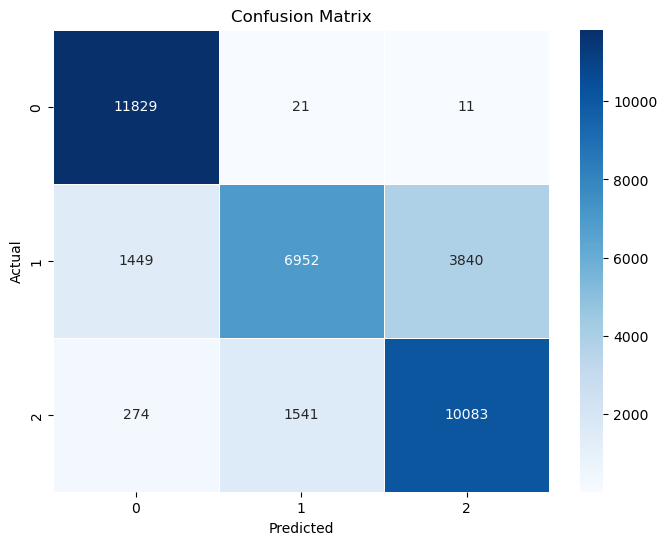

In [47]:
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [50]:
new_df = pd.DataFrame(data=y, columns=['ChurnCategory'])
new_df = pd.concat([X, new_df], axis=1)
new_df

,CustomerID,Age,NumOfChildren,AccountBalance,CreditScore,NumOfProducts,IsActiveMember,NumOfTransactions,TotalTransactionAmount,NumOfLogins,...,NoOperation,NoTransaction,NoLogin,Tenure,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,ChurnCategory
0,0.000000,0.212766,0.000000,0.451053,0.785714,0.333333,0.0,0.330661,0.391263,0.835165,...,0.321429,0.711538,0.947802,0.189300,1.0,0.0,0.0,0.0,1.0,1
1,0.000005,0.829787,0.000000,0.407684,0.445714,0.666667,0.0,0.795591,0.321884,0.244505,...,0.799451,0.225275,0.793956,0.366255,0.0,1.0,0.0,1.0,0.0,1
2,0.000010,0.191489,0.333333,0.180421,0.171429,1.000000,0.0,0.619238,0.600902,0.516484,...,0.920330,0.868132,0.379121,0.484225,1.0,0.0,0.0,0.0,1.0,2
3,0.000015,0.319149,0.000000,0.879684,0.005714,1.000000,1.0,0.412826,0.701042,0.467033,...,0.818681,0.626374,0.000000,0.200274,1.0,0.0,0.0,1.0,0.0,1
4,0.000020,1.000000,0.000000,0.898421,0.742857,1.000000,1.0,0.116232,0.187395,0.464286,...,0.063187,0.892857,1.000000,0.486968,0.0,1.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,0.046460,0.851064,1.000000,0.176842,0.228571,1.000000,0.0,0.456914,0.429038,0.027473,...,0.439560,0.247253,0.244505,0.392318,1.0,0.0,0.0,0.0,1.0,2
359996,0.525318,0.595745,1.000000,0.755789,0.237143,0.333333,0.0,0.885772,0.785812,0.934066,...,0.662088,0.420330,0.964286,0.368999,0.0,1.0,0.0,1.0,0.0,2
359997,0.999140,0.957447,0.000000,0.522421,0.985714,0.333333,1.0,0.162325,0.242485,0.521978,...,0.653846,0.368132,0.280220,0.056241,1.0,0.0,1.0,0.0,0.0,2
359998,0.893169,0.765957,1.000000,0.979895,0.614286,0.666667,1.0,0.945892,0.309579,0.722527,...,0.206044,0.936813,0.802198,0.419753,1.0,0.0,1.0,0.0,0.0,2


<Axes: >

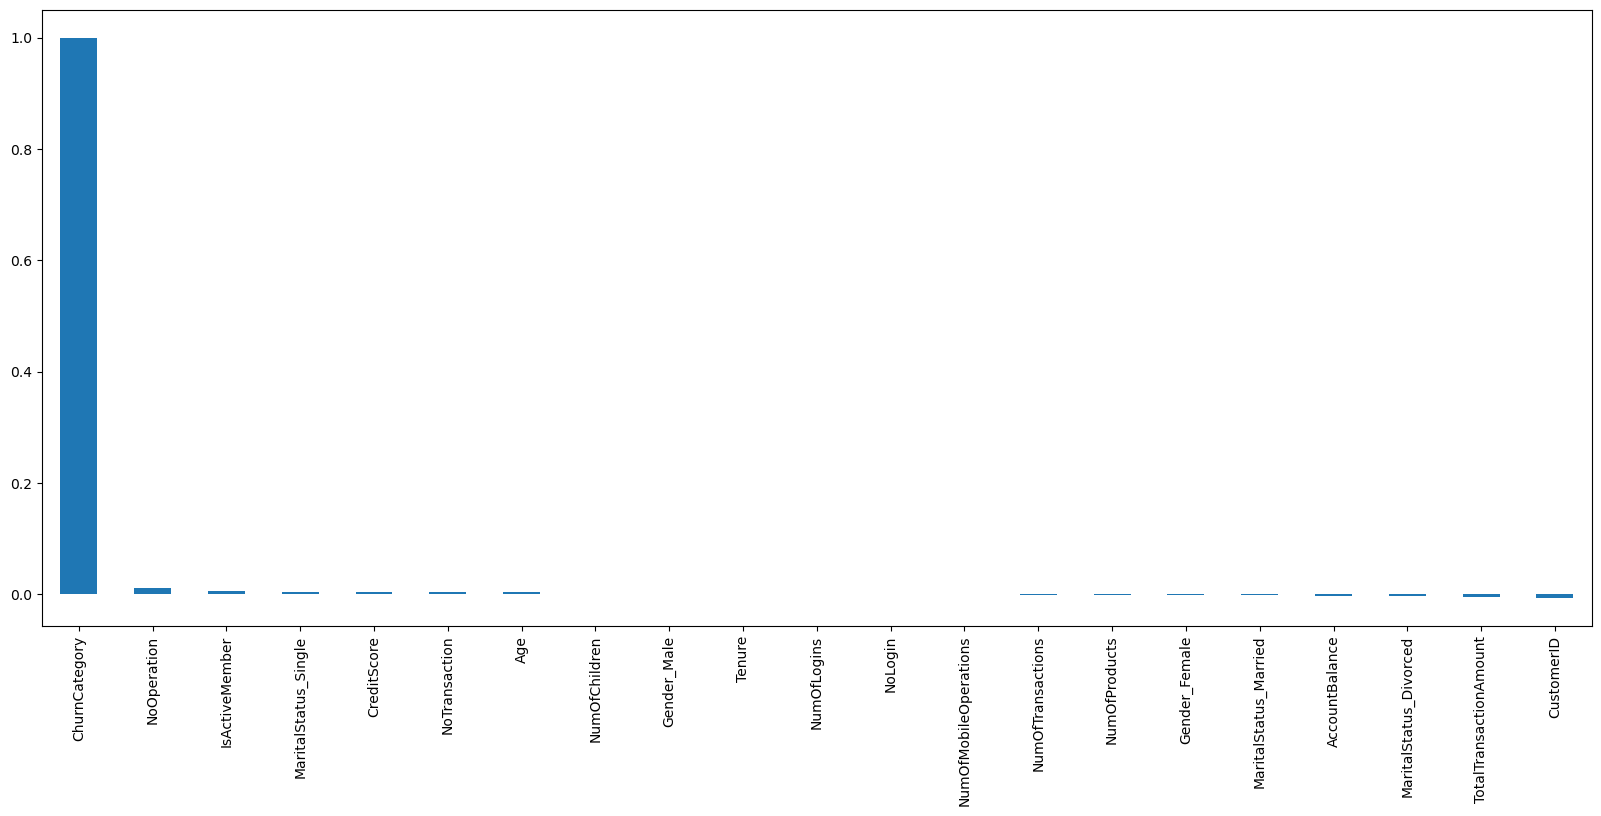

In [51]:
plt.figure(figsize=(20,8))
new_df.corr()['ChurnCategory'].sort_values(ascending= False).plot(kind='bar')

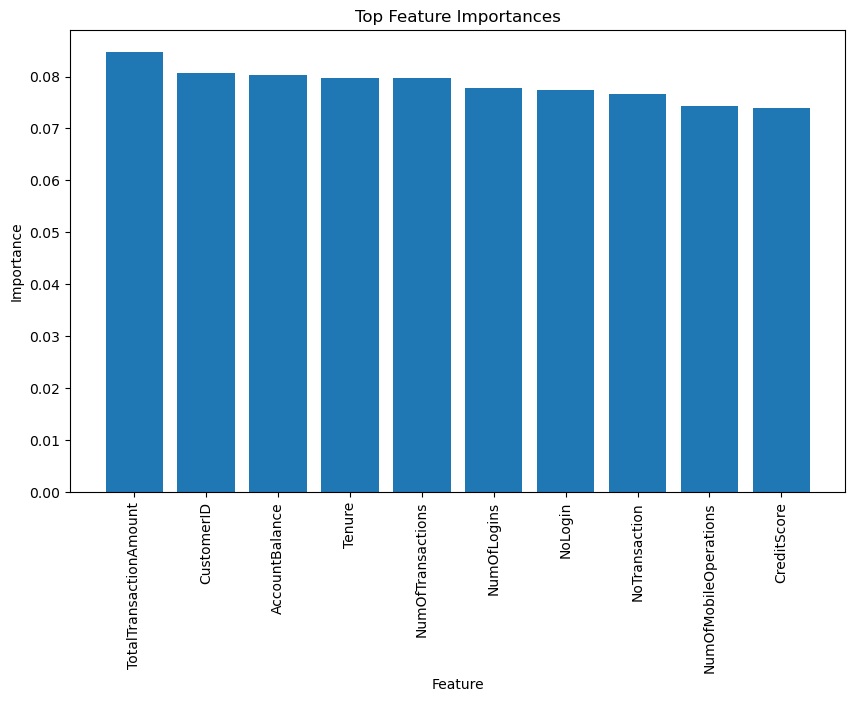

In [54]:

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

importances = clf.feature_importances_

# Getting the feature names from training set
feature_names = X_train.columns

# And sorting the feature importances in descending order for better visulization
indices = importances.argsort()[::-1]

top_n = 10 
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.bar(range(top_n), importances[indices][:top_n], align="center")
plt.xticks(range(top_n), feature_names[indices][:top_n], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


# Visualizing the correlations

/var/folders/44/g8mx_txj09321s2ptbjz1vbh0000gn/T/ipykernel_916/1683942178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_features_df['ChurnCategory'] = y_train


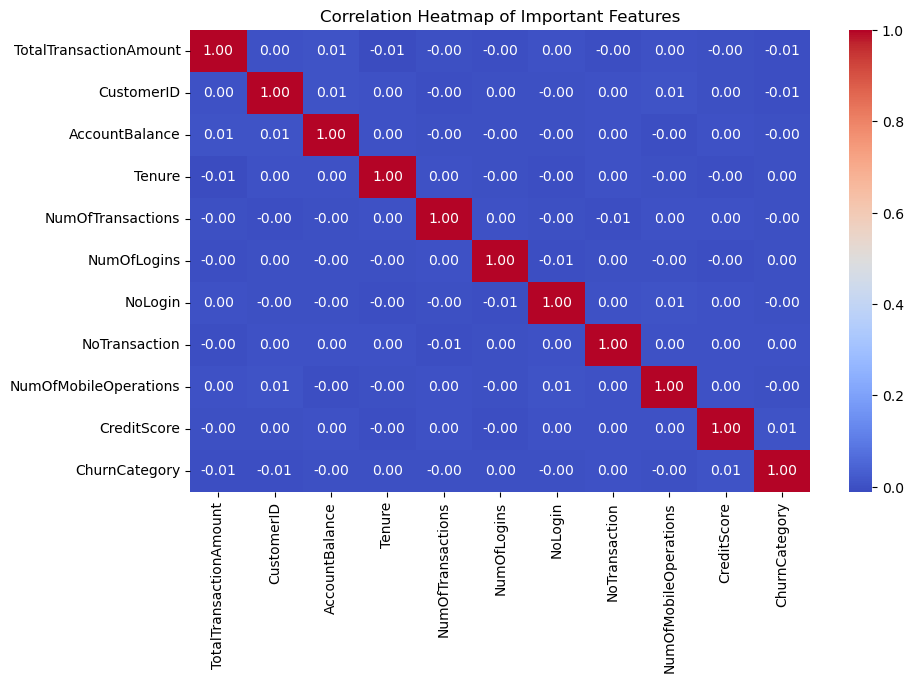

In [64]:

important_features_df = X_train[feature_names[indices][:top_n]]

# Adding the target variable to the DataFrame
important_features_df['ChurnCategory'] = y_train

# Creating a correlation matrix
correlation_matrix = important_features_df.corr()

# Creating a heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Important Features")
plt.show()

# Saving the decision tree model for future use

In [65]:
import joblib

model_filename = 'decision_tree.pkl'

joblib.dump(decision_tree, model_filename)

print(f"Decision Tree model saved as '{model_filename}'")


Decision Tree model saved as 'decision_tree.pkl'


In [66]:
loaded_model = joblib.load('decision_tree.pkl')

In [67]:
loaded_model

DecisionTreeClassifier()